In [1]:
import matplotlib.pyplot as plt

In [2]:
from recommender_systems.extra_functions import work_with_tables, work_with_matrices
from recommender_systems.extra_functions import work_with_models, work_with_ratings
from recommender_systems.models.memory_based_models import UserBasedModel
from recommender_systems.models.latent_factor_models import AlternatingLeastSquaresModel
from recommender_systems import metrics 

## Получение матрицы из таблицы

In [3]:
PATH_TO_TABLE = '../data_train/tables/random_100_50.csv'
PATH_TO_MATRIX = '../data_train/matrices/random_100_50_matrix.npz'

In [4]:
data = work_with_tables.read_data_from_csv(PATH_TO_TABLE)
data['user_id'] = data['user_id'].astype(int)
data['item_id'] = data['item_id'].astype(int)
data

,user_id,item_id,rating
0,0,0,0.766240
1,0,1,0.153712
2,0,2,0.628120
3,0,3,0.230611
4,0,4,0.605685
...,...,...,...
4995,99,45,0.022333
4996,99,46,0.416725
4997,99,47,0.635885
4998,99,48,0.234696


In [5]:
matrix = work_with_tables.generate_sparse_matrix(data, 'user_id', 'item_id', 'rating')
matrix

<100x50 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in COOrdinate format>

In [6]:
work_with_matrices.write_matrix_to_file(matrix, PATH_TO_MATRIX)

## Чтение матрицы. Получение тренировочной матрицы

In [7]:
matrix = work_with_matrices.read_matrix_from_file(PATH_TO_MATRIX)

In [8]:
train_matrix = work_with_matrices.get_train_matrix(matrix, 0.2)
train_matrix

<100x50 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in COOrdinate format>

## Обучение модели без эпох

In [9]:
model_ub = UserBasedModel(k_nearest_neighbours=5)
model_ub

In [10]:
model_ub = model_ub.fit(train_matrix)

In [11]:
model_ub.predict(0)

array([ 5,  6, 16, 29, 23, 44, 26, 27, 38, 25, 37, 47, 18, 21, 17, 34, 32,
        0, 19, 12,  8,  4, 14, 46, 22, 31, 48,  2, 36, 11, 30, 35, 39,  3,
        7, 33,  1, 15, 10, 49, 41, 20, 42, 45, 28, 24,  9, 43, 13, 40])

In [12]:
model_ub.predict_ratings(0)

array([ 0.0799798 ,  0.03907567,  0.06118324,  0.04504485,  0.076057  ,
        0.38521157,  0.30730715,  0.04229097,  0.07648362,  0.01194289,
        0.03590791,  0.05560924,  0.07685856,  0.00586049,  0.06742786,
        0.03714878,  0.27601538,  0.11083087,  0.11671789,  0.07745902,
        0.0263523 ,  0.11463812,  0.06391406,  0.25574557,  0.01442083,
        0.20502056,  0.23872635,  0.22808141,  0.01684282,  0.25658243,
        0.05151922,  0.06343015,  0.09152838,  0.0398563 ,  0.09498698,
        0.04931654,  0.05912525,  0.17769866,  0.22575971,  0.04845763,
       -0.01190556,  0.02698072,  0.02387902,  0.0113286 ,  0.24510784,
        0.02308041,  0.06683298,  0.13466886,  0.0630628 ,  0.03352001])

## Обучение модели с эпохами

In [13]:
model_als = AlternatingLeastSquaresModel(dimension=25)
model_als

In [14]:
model_als = model_als.fit(train_matrix, epochs=20, debug_name='mse', verbose=True)

100%|██████████| 20/20 [00:01<00:00, 11.64it/s]


In [15]:
model_als.predict(13)

array([17, 18, 33, 10, 30, 32, 45, 44, 29, 47,  1, 27, 42, 22, 40, 39, 46,
        2, 20, 19, 37, 15, 38, 35,  0, 21,  8, 16, 12, 36, 41,  3, 48, 13,
       14, 34, 11, 23, 24, 31, 25,  6,  9,  7,  4, 49, 26, 43, 28,  5])

In [16]:
model_als.predict_ratings(13)

array([ 0.04113302,  0.21514228,  0.10832074, -0.02573051, -0.08931638,
       -0.15864085, -0.0738369 , -0.08242986,  0.03858675, -0.07587315,
        0.73441737, -0.03600967,  0.03141769, -0.03090774, -0.03117221,
        0.07540743,  0.03269438,  1.10633484,  1.05986197,  0.09067893,
        0.09339898,  0.04002671,  0.14568104, -0.05851004, -0.06397693,
       -0.06815583, -0.09659069,  0.16079424, -0.12506664,  0.31285179,
        0.71277512, -0.06660312,  0.49807787,  0.81634843, -0.03310818,
        0.05057068,  0.01716759,  0.08509543,  0.05665363,  0.11568657,
        0.1365956 ,  0.00716716,  0.15623002, -0.10329299,  0.35001635,
        0.41692715,  0.11101387,  0.23610159, -0.02856994, -0.09569911])

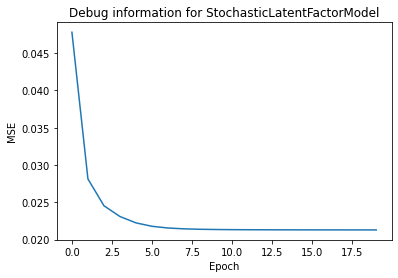

In [17]:
debug_information = model_als.debug_information.get()


plt.plot(range(len(debug_information)), debug_information)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Debug information for StochasticLatentFactorModel');

## Сохранение и загрузка модели

In [18]:
model_als.debug_information = None
work_with_models.save_model_to_file(model_als, 'model.pkl')

In [19]:
model_save = work_with_models.get_model_from_file('model.pkl')
model_save

In [20]:
model_save.predict(13)

array([17, 18, 33, 10, 30, 32, 45, 44, 29, 47,  1, 27, 42, 22, 40, 39, 46,
        2, 20, 19, 37, 15, 38, 35,  0, 21,  8, 16, 12, 36, 41,  3, 48, 13,
       14, 34, 11, 23, 24, 31, 25,  6,  9,  7,  4, 49, 26, 43, 28,  5])

## Получение метрик качества для модели

In [21]:
users_count = 50

### Метрики для рейтингов

In [22]:
predicted_ratings = [model_als.predict_ratings(user_index) for user_index in range(users_count)]
true_ratings = [matrix.getrow(user_index).toarray()[0] for user_index in range(users_count)]

In [23]:
metrics.mean_square_error(true_ratings, predicted_ratings)

0.2628453253554591

In [24]:
metrics.mean_absolute_error(true_ratings, predicted_ratings)

0.41297846999512594

In [25]:
metrics.root_mean_square_error(true_ratings, predicted_ratings)

0.5112468774511378

### Метрики для предсказания интересов

In [26]:
true_indices, predicted_indices = list(), list()

for user_index in range(users_count):
    barrier_value = true_ratings[user_index].mean()
    true_indices.append(
        work_with_ratings.calculate_predicted_items(true_ratings[user_index], barrier_value=barrier_value)
    )
    predicted_indices.append(
        work_with_ratings.calculate_predicted_items(predicted_ratings[user_index], barrier_value=barrier_value)
    )

In [27]:
metrics.precision_k(true_indices, predicted_indices)

0.9668095238095239

In [28]:
metrics.recall_k(true_indices, predicted_indices)

0.14839370760285306

In [29]:
metrics.f1_measure(true_indices, predicted_indices)

0.24788201777816465

### Метрики для оценки ранжирования

In [30]:
metrics.normalized_discounted_cumulative_gain(true_ratings, predicted_ratings)

0.8743158073215741

In [31]:
true_interest = list()

for user_index in range(users_count):
    barrier_value = true_ratings[user_index].mean()
    true_interest.append((true_ratings[user_index] >= barrier_value).astype(int))

In [32]:
metrics.roc_auc(true_interest, predicted_ratings)

0.5351483665347923